<a href="https://colab.research.google.com/github/Luke-Williams-01/Luke-Williams-01/blob/main/ICRARproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps

In [2]:
! wget -q https://xgass.icrar.org/assets/data/xGASS_representative_sample.ascii

In [3]:
# Loading the xGASS dataset with specific columns selected
xGASStb= np.loadtxt('xGASS_representative_sample.ascii', dtype = 'float', usecols=[10,18,1,23,24,26,27,31,32], unpack= 'true')
# Loading the specfic columns with flags as separate arrays
HIsrc, HI_FLAG = np.loadtxt('xGASS_representative_sample.ascii', dtype = 'float', usecols=[26,27], unpack= 'true')
# Removing data with an index that falls into the conditions HI_FLAG >1 or HI_FLAG <90
xGASSRd = np.delete(xGASStb, np.where((HI_FLAG >1) & (HI_FLAG < 90)), axis = 1)
xGASST = xGASSRd.T

# Assigning the 1d arrays to the correct column of data
lgMstar = xGASST[:,0]
lgmust = xGASST[:,1]
lgSFR_tot_median = xGASST[:,2]
SFR_best = xGASST[:,3]
SFRerr_best = xGASST[:,4]
HIsrc = xGASST[:,5]
HI_FLAG = xGASST[:,6]
lgMHI = xGASST[:,7]
lgGF = xGASST[:,8]

In [4]:
# Testing to ensure the correct arrays are filled with the correct values
print(lgMstar)
print(lgmust)
print(lgSFR_tot_median)
print(SFR_best)
print(SFRerr_best)
print(HIsrc)
print(HI_FLAG)
print(lgMHI)
print(lgGF)

[10.709 10.539 10.625 ... 10.946 10.334 10.25 ]
[9.18 9.05 9.32 ... 9.08 9.37 8.12]
[101866. 101874. 101876. ... 332851. 332201. 332883.]
[0.82985944 0.03869768 0.0620131  ... 2.902701   0.03280856 0.93741816]
[0.         0.07982571 0.15414698 ... 0.42542186 0.         0.28900966]
[3. 4. 3. ... 4. 4. 3.]
[ 1. 99.  1. ... 99. 99.  1.]
[9.603 8.74  9.244 ... 9.183 8.664 9.517]
[-1.106 -1.799 -1.381 ... -1.763 -1.67  -0.733]


In [5]:
# Finding all the rows in the xGASS data with HIsrc > 3, if HIsrc = 4, no detection of HI, if HIsrc > 4, detection of HI
HIdet = np.where(HIsrc < 4)

lgMstar1 = np.delete(lgMstar, (HIdet))
lgmust1 = np.delete(lgmust, (HIdet))
lgSFR_tot_median1 = np.delete(lgSFR_tot_median, (HIdet))
SFR_best1 = np.delete(SFR_best, (HIdet))
SFRerr_best1 = np.delete(SFRerr_best, (HIdet))
HIsrc1 = np.delete(HIsrc, (HIdet))
HI_FLAG1 = np.delete(HI_FLAG, (HIdet))
lgMHI1 = np.delete(lgMHI, (HIdet))
lgGF1 = np.delete(lgGF, (HIdet))

print(len(lgMstar1))

375


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 8.,  4., 14., 18., 21., 11., 13.,  5.,  1.,  4.],
        [ 0.,  0.,  0., 41., 59.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 2 Lists of Patches objects>)

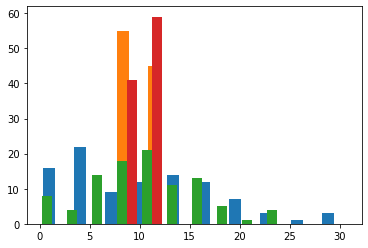

In [6]:
# Finding the median of the HI detections


In [7]:
# Finding the Diameter(HI)-to-Mass(HI) relation using, log(DHI) = 0.506*log(MHI) - 3.293
'''
lgDHI = 0.506*lgMHI1-3.292

# Query the above process
# To find the radius of each galaxy we find RHI = 0.5*DHI
RHI = 0.5*(10**(lgDHI))

# Query the below --> profile used is from 0.1R to 1.3R

# Plotting the D(HI)-M(HI) relation
plt.figure()
plt.plot(10**(lgDHI), 10**(lgMHI1), 'k.')
plt.xlabel('D$_{HI}$ [kpc]')
plt.ylabel('M$_{HI}$ [M$_{solar}$]');

# Plotting the R(HI)-M(HI) relation
plt.figure()
plt.plot(RHI, 10**(lgMHI1), 'k.')
plt.xlabel('R$_{HI}$ [kpc]')
plt.ylabel('M$_{HI}$ [M$_{solar}$]')

x = RHI
p = np.linspace(0, max(RHI), 1000)
y = 10**(lgMHI1)
# mean and sigma calculation
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
plt.plot(p, Gauss(p, *popt), 'r-');

grad = popt[0]
print(grad)
'''

"\nlgDHI = 0.506*lgMHI1-3.292\n\n# Query the above process\n# To find the radius of each galaxy we find RHI = 0.5*DHI\nRHI = 0.5*(10**(lgDHI))\n\n# Query the below --> profile used is from 0.1R to 1.3R\n\n# Plotting the D(HI)-M(HI) relation\nplt.figure()\nplt.plot(10**(lgDHI), 10**(lgMHI1), 'k.')\nplt.xlabel('D$_{HI}$ [kpc]')\nplt.ylabel('M$_{HI}$ [M$_{solar}$]');\n\n# Plotting the R(HI)-M(HI) relation\nplt.figure()\nplt.plot(RHI, 10**(lgMHI1), 'k.')\nplt.xlabel('R$_{HI}$ [kpc]')\nplt.ylabel('M$_{HI}$ [M$_{solar}$]')\n\nx = RHI\np = np.linspace(0, max(RHI), 1000)\ny = 10**(lgMHI1)\n# mean and sigma calculation\nmean = sum(x * y) / sum(y)\nsigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))\ndef Gauss(x, a, x0, sigma):\n    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))\npopt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])\nplt.plot(p, Gauss(p, *popt), 'r-');\n\ngrad = popt[0]\nprint(grad)\n"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


"\nplt.subplot(223)\nplt.plot(lgSFR_tot_median1, lgMHI1, 'k.', label= 'HI detection')\nplt.plot(lgSFR_tot_median2, lgMHI2, 'r.', label= 'No HI detection')\nplt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')\nplt.ylabel('log(M$_{HI}$)')\nplt.legend(loc='best')\n\nplt.plot()\nplt.xlabel('log(M*) [Msolar]')\nplt.ylabel('')\nplt.legend(loc='best')\n\nplt.subplot(224)\nplt.plot()\nplt.xlabel('')\nplt.ylabel('')\nplt.legend(loc='best');\n"

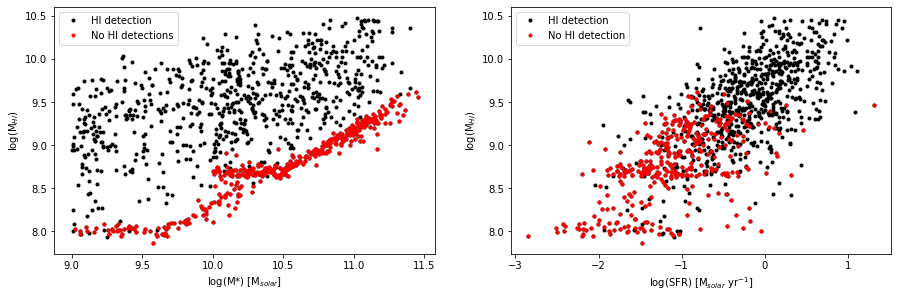

In [8]:
# Global HI mass and HI mass contained in the optical regions
plt.figure(figsize = (15,10))

plt.subplot(221)
plt.plot(lgMstar, lgMHI, 'k.', label= 'HI detection')
plt.plot(lgMstar1, lgMHI1, 'r.', label= 'No HI detections')
plt.xlabel('log(M*) [M$_{solar}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(np.log10(SFR_best), lgMHI, 'k.', label= 'HI detection')
plt.plot(np.log10(SFR_best1), lgMHI1, 'r.', label= 'No HI detection')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')
'''
plt.subplot(223)
plt.plot(lgSFR_tot_median1, lgMHI1, 'k.', label= 'HI detection')
plt.plot(lgSFR_tot_median2, lgMHI2, 'r.', label= 'No HI detection')
plt.xlabel('log(SFR) [M$_{solar}$ yr$^{-1}$]')
plt.ylabel('log(M$_{HI}$)')
plt.legend(loc='best')

plt.plot()
plt.xlabel('log(M*) [Msolar]')
plt.ylabel('')
plt.legend(loc='best')

plt.subplot(224)
plt.plot()
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='best');
'''